## Import Libraries

In [1]:
import cv2
import os
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

## Import Env File

In [2]:
from dotenv import load_dotenv  

load_dotenv()
datasets_path = os.getenv('AUGMENTED_PATH_BALI_PEKALONGAN')
# datasets_path = os.getenv('AUGMENTED_PATH_JOGJA_PEKALONGAN')
models_path = os.getenv('MODELS_PATH')

In [3]:
os.listdir(datasets_path)

['bali', 'pekalongan']

## Parameters

In [5]:
test_split_ratio = 0.2

## GLCM Function

In [ ]:
def extract_glcm_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Tambahkan jarak dan sudut yang bervariasi
    distances = [1, 2, 3]  # Jarak pixel: 1, 2, 3
    angles = [0, np.pi/4, np.pi/2, 3*np.pi/4]  # Sudut: 0°, 45°, 90°, 135°

    # Hitung GLCM
    glcm = graycomatrix(gray, distances=distances, angles=angles, levels=256, symmetric=True, normed=True)

    # Daftar fitur yang ingin diambil
    props = ['contrast', 'dissimilarity', 'homogeneity', 'energy', 'correlation']

    features = []

    # Ekstraksi setiap fitur dan flatten hasilnya
    for prop in props:
        prop_values = graycoprops(glcm, prop)  # shape = (len(distances), len(angles))
        features.extend(prop_values.flatten())

    return features

## Load The Dataset and Extract The Features

In [7]:
features = []
labels = []

for class_idx, class_name in enumerate(os.listdir(datasets_path)):
    folder = os.path.join(datasets_path, class_name)
    for img_name in os.listdir(folder):
        img_path = os.path.join(folder, img_name)
        image = cv2.imread(img_path)
        if image is None:
            continue
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Tambahkan fitur dari gambar asli juga jika diinginkan
        glcm_features = extract_glcm_features(image)
        features.append(glcm_features)
        labels.append(class_idx)

features = np.array(features)
labels = np.array(labels)

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    features, labels,
    test_size=test_split_ratio,
    random_state=42,
    stratify=labels  # Menjaga distribusi kelas tetap seimbang
)

In [9]:
# Melihat 10 baris pertama dari X_train
print("X_train sebelum normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sebelum normalisasi (10 baris pertama):
[[6.24619895e+02 1.00450118e+03 5.77028988e+02 1.03713200e+03
  1.57131411e+03 1.00450118e+03 1.49317469e+03 1.03713200e+03
  2.13409745e+03 2.06084135e+03 2.08682836e+03 2.12808804e+03
  1.63941184e+01 2.09141748e+01 1.56911435e+01 2.13196123e+01
  2.63282658e+01 2.09141748e+01 2.55508969e+01 2.13196123e+01
  3.07683420e+01 3.03408611e+01 3.03161159e+01 3.09242553e+01
  2.15309487e-01 1.96949541e-01 2.15384252e-01 1.97007704e-01
  1.85124596e-01 1.96949541e-01 1.85561466e-01 1.97007704e-01
  1.74314508e-01 1.68687406e-01 1.73616298e-01 1.68617755e-01
  1.13031749e-01 1.07546929e-01 1.12716381e-01 1.07704603e-01
  1.05416932e-01 1.07546929e-01 1.04491036e-01 1.07704603e-01
  1.00434290e-01 9.75472663e-02 1.00203456e-01 9.75358258e-02
  9.10345778e-01 8.55294148e-01 9.17236062e-01 8.50593436e-01
  7.73502182e-01 8.55294148e-01 7.85111828e-01 8.50593436e-01
  6.91023067e-01 7.00796664e-01 6.98650834e-01 6.91033450e-01]
 [3.90497638e+02 4.43

In [10]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  
X_test = scaler.transform(X_test)        

In [11]:
# Melihat 10 baris pertama dari X_train
print("X_train sesudah normalisasi (10 baris pertama):")
print(X_train[:10])

X_train sesudah normalisasi (10 baris pertama):
[[-3.35971732e-01 -2.56666669e-01 -2.85862198e-01 -2.55177840e-01
  -1.81213878e-01 -2.56666669e-01 -1.26591884e-01 -2.55177840e-01
  -1.70569124e-01 -1.33942309e-01 -1.05814837e-01 -1.20873902e-01
  -1.95087011e-01 -1.05453633e-01 -1.23286509e-01 -1.00010716e-01
  -6.07202367e-02 -1.05453633e-01  1.24127147e-02 -1.00010716e-01
  -9.67763453e-02 -3.58127788e-02 -1.74177402e-02 -2.03524428e-02
   3.55619100e-01  3.95093039e-01  3.00791905e-01  4.12101097e-01
   4.63224978e-01  3.95093039e-01  4.14407364e-01  4.12101097e-01
   5.26407853e-01  4.53571109e-01  4.74138633e-01  4.67119862e-01
   7.34146846e-01  7.13758312e-01  7.24580748e-01  7.16732698e-01
   7.15414162e-01  7.13758312e-01  6.93288892e-01  7.16732698e-01
   6.92191077e-01  6.66156234e-01  6.84018766e-01  6.66677555e-01
   4.73608390e-01  4.25884295e-01  4.17810985e-01  4.26721412e-01
   3.62449638e-01  4.25884295e-01  3.05100013e-01  4.26721412e-01
   3.85484433e-01  3.3822823

In [14]:
# from sklearn.decomposition import PCA

# pca = PCA(n_components=0.95) 
# X_train_pca = pca.fit_transform(X_train)
# X_test_pca = pca.transform(X_test)

In [12]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (768, 60)
X_test shape: (192, 60)


In [13]:
print("Y_train shape:", y_train.shape)
print("Y_test shape:", y_test.shape)

Y_train shape: (768,)
Y_test shape: (192,)


In [18]:
# # Melihat 10 baris pertama dari X_train_pca
# print("X_train_pca (10 baris pertama):")
# print(X_train_pca[:10])

## Grid Search

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Untuk kernel linear
param_grid_linear = {
    'kernel': ['linear'],
    'C': [0.1, 1, 10, 100],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel RBF
param_grid_rbf = {
    'kernel': ['rbf'],
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'shrinking': [True, False],
    'tol': [1e-3, 1e-4],
    'class_weight': [None, 'balanced']
}

# Untuk kernel poly
param_grid_poly = {
    'kernel': ['poly'],
    'C': [0.1, 1, 10],
    'degree': [2, 3, 4],
    'gamma': ['scale', 'auto'],
    'coef0': [0.0, 0.1, 0.5],
    'shrinking': [True, False],
    'tol': [1e-3],
    'class_weight': [None]
}

# Gabungkan semua grid
param_grid = [param_grid_linear, param_grid_rbf, param_grid_poly]

grid = GridSearchCV(SVC(), param_grid, cv=5, n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)

print("Best parameters:", grid.best_params_)
print("Best cross-validation score:", grid.best_score_)


Fitting 5 folds for each of 188 candidates, totalling 940 fits
Best parameters: {'C': 10, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True, 'tol': 0.001}
Best cross-validation score: 0.845115015703251


## Model

In [15]:
from sklearn.svm import SVC

# Gunakan parameter terbaik dari GridSearchCV
best_model = SVC(C=10, class_weight=None, gamma='auto', kernel='rbf', shrinking=True, tol=0.001)
best_model.fit(X_train, y_train)


SVC(C=10, gamma='auto')

## Evaluates

In [16]:
# Evaluasi model
y_pred = best_model.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix
print("Akurasi:", accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Akurasi: 0.8072916666666666
              precision    recall  f1-score   support

           0       0.82      0.78      0.80        96
           1       0.79      0.83      0.81        96

    accuracy                           0.81       192
   macro avg       0.81      0.81      0.81       192
weighted avg       0.81      0.81      0.81       192



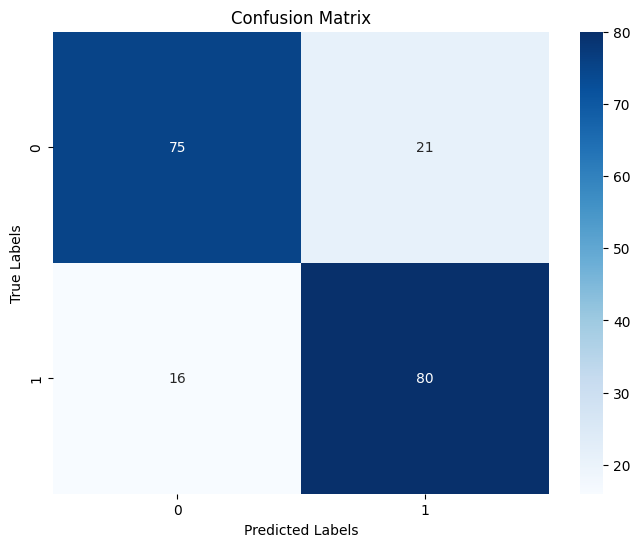

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Buat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualisasikan dengan heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


## Save The Model

In [18]:
from joblib import dump

# Simpan model ke file
dump(best_model, models_path+'/svm_glcm_model2.joblib')

['D:/Batik-Classifier-Model/Output/svm_glcm_model2.joblib']